## Importing the desired libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf 

## Reading the data from the csv files

In [2]:
train_data = pd.read_csv('./../data/train_data.csv')
test_data = pd.read_csv('./../data/test_data.csv')

In [12]:
data = pd.read_csv('./../data/sign_mnist_data.csv')

In [14]:
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [3]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(data, test_size=0.25)

NameError: name 'data' is not defined

In [40]:
train_df.shape

(25970, 785)

In [43]:
test_df.shape

(8657, 785)

In [44]:
train_df.to_csv("train_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)

## Visualizing the data
It's a good idea to view the data to get a feel of what the dataset actually looks like

In [4]:
train_data.head()

,Unnamed: 0,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,11896,23,156,161,163,164,168,169,170,171,...,59,36,0,0,0,0,0,0,0,0
1,13410,7,211,212,213,213,214,214,214,214,...,200,222,156,102,131,112,122,97,130,212
2,29940,2,184,185,186,187,190,192,192,192,...,214,211,211,211,209,208,208,206,205,203
3,30127,6,150,153,154,157,159,159,160,161,...,173,172,170,168,165,162,162,159,157,155
4,29059,4,165,167,169,169,169,171,172,172,...,12,10,18,0,111,225,203,207,207,206


<AxesSubplot:xlabel='label', ylabel='count'>

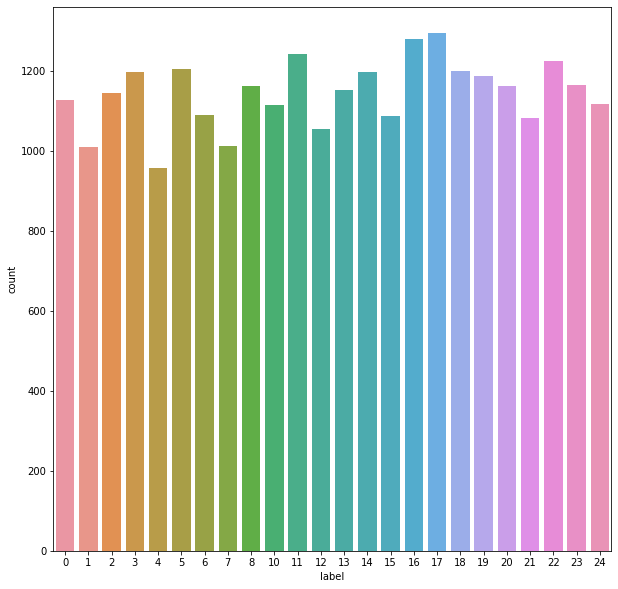

In [7]:
# Create a countplot of all the labels
plt.figure(figsize=(10,10))
sns.countplot(data=train_data, x='label')

## Normalizing and Reshaping the data

In [11]:
train_data.drop(['label'], axis=1)

,Unnamed: 0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,11896,156,161,163,164,168,169,170,171,172,...,59,36,0,0,0,0,0,0,0,0
1,13410,211,212,213,213,214,214,214,214,214,...,200,222,156,102,131,112,122,97,130,212
2,29940,184,185,186,187,190,192,192,192,192,...,214,211,211,211,209,208,208,206,205,203
3,30127,150,153,154,157,159,159,160,161,161,...,173,172,170,168,165,162,162,159,157,155
4,29059,165,167,169,169,169,171,172,172,174,...,12,10,18,0,111,225,203,207,207,206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25965,15817,111,123,142,155,164,169,173,177,182,...,124,211,255,253,253,252,252,251,250,250
25966,24377,167,168,170,171,172,172,172,172,173,...,201,201,200,199,199,197,195,192,191,163
25967,27981,123,127,132,136,140,144,147,150,151,...,214,204,204,204,204,204,203,203,202,200
25968,7260,138,140,143,145,147,149,151,153,154,...,166,132,97,81,82,150,211,215,214,214


In [5]:
y_train = train_data['label']
X_train = train_data.drop('label', axis=1).values.reshape(-1, 28, 28, 1)
y_test = test_data['label']
X_test = test_data.drop('label', axis=1).values.reshape(-1, 28, 28, 1)

X_train = X_train / 255.0
X_test = X_test / 255.0

ValueError: cannot reshape array of size 20386450 into shape (28,28,1)

In [9]:
labels = y_train.unique().tolist()
labels.sort()
labels

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [11]:
classes = []
for label in labels:
    classes.append(chr(label + 65))
classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y']

## Let's view some of the actual images

Images from the training set

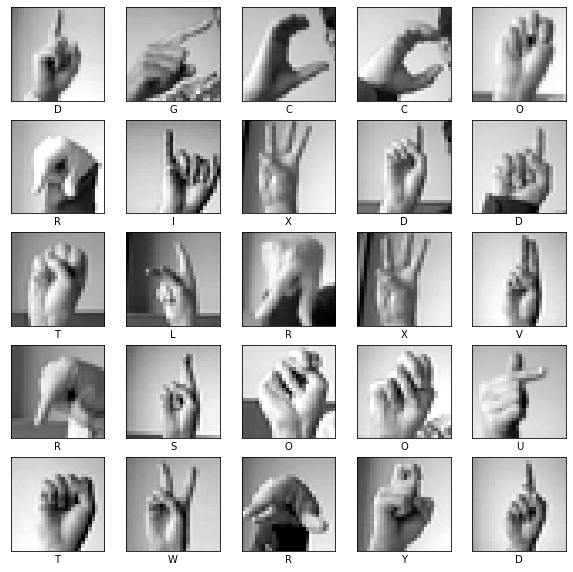

In [12]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='gray')
    plt.xlabel(classes[y_train[i]])
plt.show()

Images from the test set

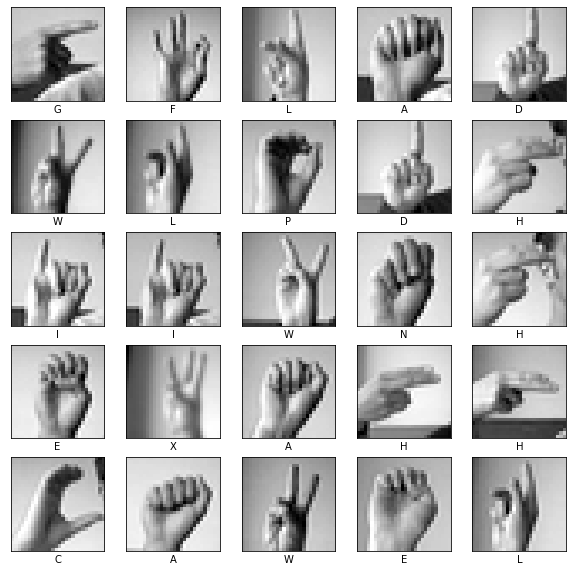

In [13]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap='gray')
    plt.xlabel(classes[y_test[i]])
plt.show()

## Binarizing the labels
Binarizing categorical data consisting of multiple classes involves converting the categorical data into a binary format. This is typically done using a technique called one-hot encoding. One-hot encoding creates a binary vector for each class, where the vector has a length equal to the number of classes and has a 1 in the position corresponding to the class and 0s elsewhere. This allows the categorical data to be represented in a format that can be used by machine learning models. We will use the `LabelBinarizer` class from `sklearn.preprocessing` for this purpose.

In [14]:
from sklearn import preprocessing

lb = preprocessing.LabelBinarizer()
lb.fit(y_train)
y_train_binarized = lb.transform(y_train)
y_test_binarized = lb.transform(y_test)

Let's see what binarizing did to `y_train`.

In [15]:
y_train_binarized

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

Binarizing the labels did one-hot-encoding to the labels

In [16]:
y_train_binarized.shape

(27455, 24)

## Let's build the model

We'll build a Convolutional Neural Network architecture for this

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(24, activation='softmax')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 24)                3

## Training the model

In [22]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X_train, y_train_binarized, validation_split=0.2, epochs=5, batch_size=128)

Epoch 1/5
172/172 [==============================] - 16s 93ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 4.3474e-04 - val_accuracy: 1.0000
Epoch 2/5
172/172 [==============================] - 15s 87ms/step - loss: 2.6092e-04 - accuracy: 1.0000 - val_loss: 3.5080e-04 - val_accuracy: 1.0000
Epoch 3/5
172/172 [==============================] - 15s 89ms/step - loss: 1.9921e-04 - accuracy: 1.0000 - val_loss: 2.7310e-04 - val_accuracy: 1.0000
Epoch 4/5
172/172 [==============================] - 15s 88ms/step - loss: 1.6418e-04 - accuracy: 1.0000 - val_loss: 2.7729e-04 - val_accuracy: 1.0000
Epoch 5/5
172/172 [==============================] - 16s 90ms/step - loss: 1.4302e-04 - accuracy: 1.0000 - val_loss: 2.0879e-04 - val_accuracy: 1.0000


## Let's evaluate the model's performance

In [23]:
model.evaluate(X_test, y_test_binarized)

225/225 [==============================] - 2s 7ms/step - loss: 0.5049 - accuracy: 0.9152


[0.5048796534538269, 0.9152258634567261]

## Let's plot the graphs that define the change in accuracy and loss while training

225/225 - 1s - loss: 0.5049 - accuracy: 0.9152


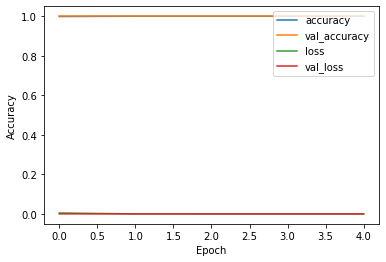

In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(X_test, y_test_binarized, verbose=2)

In [25]:
print(f'Test accuracy is {test_acc * 100:.2f}%')

Test accuracy is 91.52%


In [28]:
model.save("model.h5")

## Run the cell below to get the prediction for a random Sign Language

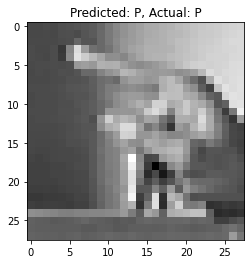

In [31]:
from tensorflow.keras.models import load_model
model_new = load_model("model.h5")

rand_idx = np.random.randint(0, len(X_test))

image = X_test[rand_idx]
label = y_test[rand_idx]

prediction = model.predict(np.expand_dims(image, axis=0))

predicted_class = np.argmax(prediction)

plt.imshow(image.squeeze(), cmap='gray')
plt.title(f'Predicted: {classes[predicted_class]}, Actual: {classes[label] if label < 9 else classes[label - 1]}')
plt.show()